
# Project: Investigate the Gapminder Datasets based on a number of economic and social indicators

Prepared by: Maria Latysheva

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report I will analyse the following Gapminder datasets showing developmnet of the countries over a period of time:
- GNI per Capita based on purchasing power parity in international USD
- Life expectancy in years
- Population growth as % to the previous year
- Inequality index, % of 100%
- Human development index, % of 100%
- Democracy index, % of 100%
- Government military spending, % of GDP
- Corruption perception index, % of 100%

I will use this data to answer the following questions about economis and social development of the world:
<ul>
<li><a href = "#question1">Section 1: What changes can be generally seen in the development of Gapminder indicators in 2018 compared to 2010?</a></li>

<li><a href = "#question2">Section 2: Are there tentative correlations between the following indicators: life expectancy, level of democracy, level of corruption and GDP per capita, human development and democracy, democracy and inequality?  </a></li>

<li><a href = "#question3">Section 3:  How is the income distributed in the world?</a></li>
</ul>

The analysed questions are listed in detail in <a href = "#eda">the introduction to the Explanatory Data Analysis</a>.
    
For the analysis I will take only data for 2010 and 2018. For some datasets the information for these years is not available. In these cases I will use the closest year for which there is information available.

In some parts of the analysis I will pay special attention to the following three countries that are of most interest to me:
- Russia (my motherland)
- Germany (the country where I currently live)
- United States (the country where I spent a year long ago)

The full datasets are avilable on the website of Gapminder at:
https://www.gapminder.org/data/



In [570]:
# Import the packages that will be used in the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Downloading datasets and taking the columns of interest from them

##### Countries and Regions dataset

The datasets I chose from the Gapminder site did not have the 'continent' column. So I downloaded an Excel file with country and region information from another Gapminder source at: https://www.gapminder.org/data/geo/.

I then deleted in Excel the columns I did not need and saved the file to a csv format. I noticed that the separator was ';'.


In [571]:
df_region = pd.read_csv('list_of_countries.csv', sep = ';')
df_region.head(3)

,name,four_regions,eight_regions,six_regions,members_oecd_g77
0,Afghanistan,asia,asia_west,south_asia,g77
1,Albania,europe,europe_east,europe_central_asia,others
2,Algeria,africa,africa_north,middle_east_north_africa,g77


I think that the division by 8 regions will be most representative. So I will choose this column to be included in my future combined dataset.

In [572]:
df_region.eight_regions.unique()

array(['asia_west', 'europe_east', 'africa_north', 'europe_west',
       'africa_sub_saharan', 'america_north', 'america_south',
       'east_asia_pacific'], dtype=object)

In [573]:
# Take the required columns and rename the regions to be used subsequently in plots
df_region = df_region[['name', 'eight_regions']]
df_region.rename(columns = {'name':'country', 'eight_regions':'region'}, inplace = True)
df_region.region.replace(to_replace=dict(asia_west='Western Asia', europe_east='Eastern Europe', africa_north='Northern Africa', europe_west = 'Western Europe',
       africa_sub_saharan= 'Sub Saharan Africa', america_north='North America', america_south='South America',
       east_asia_pacific='East Asia Pasific'), inplace=True)
df_region.head(3)

,country,region
0,Afghanistan,Western Asia
1,Albania,Eastern Europe
2,Algeria,Northern Africa


In [574]:
df_region['region'].unique()

array(['Western Asia', 'Eastern Europe', 'Northern Africa',
       'Western Europe', 'Sub Saharan Africa', 'North America',
       'South America', 'East Asia Pasific'], dtype=object)

##### Function to download all other datasets and rename columns in them 

Since I chose many separate datasets, I will wrap the csv import procedure into a function and use it all along.

In [575]:
# Write a function to download a csv file into a dataframe and rename columns

def import_csv(file, cols, old_col1, new_col1, old_col2, new_col2):
    # where:
    # file - name of the csv file
    # cols - list of columns that will be taken from the file
    # old_col1 - old name of the first year column
    # new_col1 - new name of the first year column
    # old_col2 - old name of the last year column
    # new_col2 - new name of the last year column
    df = pd.read_csv(file)
    df = df[cols]
    df.rename(columns = {old_col1:new_col1, old_col2:new_col2}, inplace = True)
    return df

#### Cross National Income per Capita
Load Worldbank's dataset of GNI (Gross National Income) per capita based on PPP (Purchasing Power Parity) converted to international dollars. A higher indicator shows a better well-being of the nation.


In [576]:
df_gdp = import_csv('gnipercapita_ppp_current_international.csv', ['country', '2010','2018'], '2010','gdp_2010','2018','gdp_2018')
df_gdp.head(3)

,country,gdp_2010,gdp_2018
0,Afghanistan,1640.0,1970.0
1,Albania,9530.0,13400.0
2,Algeria,12600.0,NaN


#### Life Expectancy
Load the dataset of Life Expectancy. The indicator shows the average number of years a newborn child is expected to live if current mortality patterns stay the same.

In [577]:
df_le = import_csv('life_expectancy_years.csv', ['country', '2010','2018'], '2010','le_2010','2018','le_2018')
df_le.head(3)

,country,le_2010,le_2018
0,Afghanistan,59.9,63.7
1,Albania,77.6,78.3
2,Algeria,76.3,77.9


#### Population growth
Load the dataset of Population Growth. The indicator shows the percentage growth compared to the previous year's popultaion.

In [578]:
df_pg = import_csv('population_growth_annual_percent.csv', ['country', '2010','2018'], '2010','pg_2010','2018','pg_2018')
df_pg.head(3)

,country,pg_2010,pg_2018
0,Afghanistan,0.02750,0.02380
1,Albania,-0.00496,-0.00247
2,Algeria,0.01810,0.02010


#### GINI Inequality Index

Load the data of income inequality index. A higher number means more inequality.

In [579]:
df_ineq = import_csv('gini.csv', ['country', '2010','2018'], '2010','ineq_2010','2018','ineq_2018')
df_ineq.head(3)

,country,ineq_2010,ineq_2018
0,Afghanistan,36.8,36.8
1,Albania,29.5,29.0
2,Algeria,28.5,27.6


#### Human Development Index
Load dataset of Human Development Index. The index is based on three dimensions: health level, educational level and living standard. A higher index shows a better well-being of the nation.

In [580]:
df_hdi = import_csv('hdi_human_development_index.csv', ['country', '2010','2015'], '2010','hdi_2010','2015','hdi_2015')
df_hdi.head(3)

,country,hdi_2010,hdi_2015
0,Afghanistan,0.454,0.479
1,Albania,0.738,0.764
2,Algeria,0.724,0.745


#### Democracy Index
Load the dataset of Democracy Index. The index is prepared by the Economist Intelligence Unit based on 60 different aspects of the society. It ranges from 0 to 100. A higher index shows a better situation with the democracy in the country. The Gapminder database shows the index as a percentage of 1.

In [581]:
df_demox = import_csv('demox_eiu.csv', ['country', '2010','2018'], '2010','demox_2010','2018','demox_2018')
df_demox.head(3)

,country,demox_2010,demox_2018
0,Afghanistan,0.248,0.297
1,Albania,0.586,0.598
2,Algeria,0.344,0.350


#### Government Military Spending
Load the dataset of Government Military Expenditures as a percentage of GDP.

In [582]:
df_gms = import_csv('military_expenditure_percent_of_gdp.csv', ['country', '2010','2018'], '2010','gms_2010','2018','gms_2018')
df_gms.head(3)

,country,gms_2010,gms_2018
0,Afghanistan,0.0195,0.00985
1,Albania,0.0156,0.01180
2,Algeria,0.0352,0.05270


#### Corruption Perception Index
Load the dataset of Transparency International score of perceived corruption. Higher values indicate less corruption.

In [583]:
df_pci = import_csv('corruption_perception_index_cpi.csv', ['country', '2012','2017'], '2012','pci_2012','2017','pci_2017')
df_pci.head(3)

,country,pci_2012,pci_2017
0,Afghanistan,8.0,15
1,Albania,33.0,38
2,Algeria,34.0,33


### Data Cleaning

#### Merge all the separate datasets into one dataset
I will perform the merger based on the 'country' column. For the merger I will use the `reduce` function.


In [584]:
# Create the list of all dataframes:
dataframes = [df_region, df_gdp, df_le, df_pg, df_ineq, df_hdi, df_demox, df_gms, df_pci]
df_gap = reduce(lambda left,right: pd.merge(left,right,on=['country'],
                                            how='outer'), dataframes)
df_gap.head(3)

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
0,Afghanistan,Western Asia,1640.0,1970.0,59.9,63.7,0.02750,0.02380,36.8,36.8,0.454,0.479,0.248,0.297,0.0195,0.00985,8.0,15.0
1,Albania,Eastern Europe,9530.0,13400.0,77.6,78.3,-0.00496,-0.00247,29.5,29.0,0.738,0.764,0.586,0.598,0.0156,0.01180,33.0,38.0
2,Algeria,Northern Africa,12600.0,NaN,76.3,77.9,0.01810,0.02010,28.5,27.6,0.724,0.745,0.344,0.350,0.0352,0.05270,34.0,33.0


#### Convert proportions to percentage for indicators

I noticed that some indicators, including:
- population growth
- human development index
- democracy index
- government military spending

are expressed as proportions. To scale the indicators down to the same scale, I will multiply the proportion-expressed indicators by 100.

In [585]:
# Write a function to convert proportions to percentage
def to_percentage(df, list_of_columns):
    for column in list_of_columns:
        df[column] = 100.00 * df[column]
    return df

# Convert the proportion-based indicators to percentage-based indicators
list_of_columns = ['pg_2010', 'pg_2018', 'hdi_2010', 'hdi_2015', 'demox_2010', 'demox_2018', 'gms_2010', 'gms_2018']
to_percentage(df_gap, list_of_columns)
df_gap.head(3)

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
0,Afghanistan,Western Asia,1640.0,1970.0,59.9,63.7,2.750,2.380,36.8,36.8,45.4,47.9,24.8,29.7,1.95,0.985,8.0,15.0
1,Albania,Eastern Europe,9530.0,13400.0,77.6,78.3,-0.496,-0.247,29.5,29.0,73.8,76.4,58.6,59.8,1.56,1.180,33.0,38.0
2,Algeria,Northern Africa,12600.0,NaN,76.3,77.9,1.810,2.010,28.5,27.6,72.4,74.5,34.4,35.0,3.52,5.270,34.0,33.0


#### Drop all rows with NaN values

In [586]:
df_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 18 columns):
country       198 non-null object
region        197 non-null object
gdp_2010      184 non-null float64
gdp_2018      179 non-null float64
le_2010       187 non-null float64
le_2018       184 non-null float64
pg_2010       193 non-null float64
pg_2018       192 non-null float64
ineq_2010     195 non-null float64
ineq_2018     195 non-null float64
hdi_2010      187 non-null float64
hdi_2015      187 non-null float64
demox_2010    164 non-null float64
demox_2018    164 non-null float64
gms_2010      149 non-null float64
gms_2018      149 non-null float64
pci_2012      172 non-null float64
pci_2017      177 non-null float64
dtypes: float64(16), object(2)
memory usage: 29.4+ KB


In [587]:
df_gap_clean = df_gap.dropna()
df_gap_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 195
Data columns (total 18 columns):
country       130 non-null object
region        130 non-null object
gdp_2010      130 non-null float64
gdp_2018      130 non-null float64
le_2010       130 non-null float64
le_2018       130 non-null float64
pg_2010       130 non-null float64
pg_2018       130 non-null float64
ineq_2010     130 non-null float64
ineq_2018     130 non-null float64
hdi_2010      130 non-null float64
hdi_2015      130 non-null float64
demox_2010    130 non-null float64
demox_2018    130 non-null float64
gms_2010      130 non-null float64
gms_2018      130 non-null float64
pci_2012      130 non-null float64
pci_2017      130 non-null float64
dtypes: float64(16), object(2)
memory usage: 19.3+ KB


#### The cleaned dataset now looks like this.

In [588]:
df_gap_clean.head(3)

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
0,Afghanistan,Western Asia,1640.0,1970.0,59.9,63.7,2.750,2.380,36.8,36.8,45.4,47.9,24.8,29.7,1.95,0.985,8.0,15.0
1,Albania,Eastern Europe,9530.0,13400.0,77.6,78.3,-0.496,-0.247,29.5,29.0,73.8,76.4,58.6,59.8,1.56,1.180,33.0,38.0
4,Angola,Sub Saharan Africa,5630.0,6170.0,59.9,64.6,3.670,3.280,42.9,42.6,49.5,53.3,33.2,36.2,4.18,1.780,22.0,19.0


<a id='eda'></a>
## Exploratory Data Analysis

In this section I will use the clean dataset to answer the following questions about economis and social development of the world with particular focus on Russia, Germany and the US:
<ul>
<li><a href = "#question1">Section 1: General developments:</a></li>
<ul><li>What changes can be generally seen in the development of Gapminder indicators in 2018 compared to 2010?</li>
<li>How is income distributed among the regions?</li>
<li>How is the population growing by regions?</li>
<li>How does Russia stand to Germany and the United States in terms of GPD per capita?</li> 
<li>How did the inequality, human development, democracy and corruption perception indices changed over this period?</li></ul>

<li><a href = "#question2">Section 2: Are there tentative correlations between the following indicators:</a></li>
    <ul><li>Life expectancy and GPD per capita?</li>
        <li>Level of democracy and GDP per capita?</li>
        <li>Level of corruption and GDP per capita?</li>
        <li>Human development index and level of democracy?</li>
        <li>Government military expenditures and the level of democracy?</li>
        <li>Level of democracy and level of inequality</li>
        <li>How does Russia stand compared to Germany and the United States in terms of these indicators?</li></ul>
    

<li><a href = "#question3">Section 3:  What are the developments in the disbribution of income in the world:</a></li>
    <ul><li>Is income distributed equally among countries in 2018?</li>
        <li>What are the poorest and richest countries?</li>
        <li>How has the inequality index changed by regions in 2018 compared to 2010?</li></ul>
</ul>



#### The final dataset contains the following fields:

|Column name | Description | Explanation|
|:---|:---|:---|
| country    | Country | Country |
| region    | Region | One of 8 regions |
| gdp_2010 | GNI per capita, 2010 | Gross National Income per capita based on Purchasing Power Parity|
| gdp_2018 | GNI per capita, 2018 |
| le_2010 | life expectancy, 2010 | Life expectancy in years
| le_2018 | life expectancy, 2018 |
| pg_2010 | population growth, 2010 | Population growth as a % to the previous year's population
| pg_2018 | population growth, 2018 |
| ineq_2010|inequality index, 2010| A higher index shows more inequality
| ineq_2018|inequality index, 2018|
|hdi_2010|human development index, 2010| A higher index shows better human development
|hdi_2015|human development index, 2015|
|demox_2010| democracy index, 2010| A higher index shows more democracy
|demox_2018| democracy index, 2018|
|gms_2010| government military spending, 2010| Military expenses as % of GDP
|gms_2018| government military spendin, 2018|
|pci_2012|perceived corruption index, 2012| A higher index shows less corruption
|pci_2017|perceived corruption index, 2017|

<a id='question1'></a>
### Section 1:  General developments in the world in 2018 compared to 2010

#### What changes can be generally seen in the development of Gapminder indicators in 2018 compared to 2010?

First, I will figure out tentative tendencies using the summary information about the dataset. 

In [589]:
df_gap_clean.describe()

,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,16713.384615,22066.615385,71.147692,73.824615,1.389269,1.293885,38.724615,38.376923,69.300000,71.405385,59.674615,59.684615,1.830015,1.771262,44.823077,45.115385
std,16310.932015,20283.193239,9.127412,7.285167,1.368253,1.144570,8.332863,8.009815,16.306417,15.814047,20.404416,20.129855,1.355063,1.339054,19.051731,18.597589
min,620.000000,900.000000,46.000000,52.400000,-2.100000,-0.954000,24.800000,25.000000,32.300000,35.200000,15.200000,14.900000,0.000000,0.000000,8.000000,15.000000
25%,3975.000000,5477.500000,64.300000,68.800000,0.465250,0.471250,32.225000,32.400000,55.500000,58.225000,41.275000,43.875000,0.985250,0.982500,31.250000,31.000000
50%,11100.000000,15250.000000,74.000000,75.300000,1.240000,1.245000,37.500000,37.550000,72.300000,74.250000,62.150000,62.600000,1.500000,1.420000,38.000000,39.500000
75%,26200.000000,34000.000000,78.175000,79.575000,2.280000,2.020000,43.950000,42.925000,82.075000,84.650000,76.600000,75.675000,2.295000,2.082500,55.750000,56.750000
max,79200.000000,94700.000000,83.200000,85.000000,5.880000,4.920000,63.300000,63.000000,93.900000,94.900000,98.000000,98.700000,8.570000,8.770000,90.000000,89.000000


From the summary information we can see the following tentative changes in the indicators in 2018 (2015 for human development index and 2017 for perceived corruption index) compared to 2010:
- improved: income per capita, life expectancy, inequality index, human development index, government military spending, perceived corruption index
- stayed about the same: democracy index
- worsened: population growth

#### How did the average GPD per capita changed in 2018 compared to 2010?

In the plot below I will visualise the changes in the average GDP per capita in 2018 compared to 2010. 

In [590]:
gdp_2010_mean = df_gap_clean['gdp_2010'].mean()
gdp_2018_mean = df_gap_clean['gdp_2018'].mean()

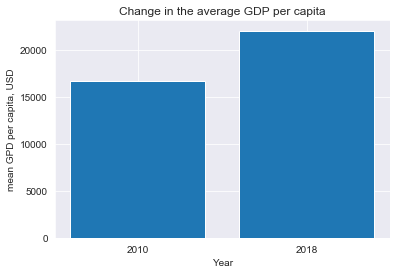

In [591]:
x = ['2010','2018']
y = [gdp_2010_mean, gdp_2018_mean]
plt.xlabel('Year')
plt.ylabel('mean GPD per capita, USD')
plt.title('Change in the average GDP per capita')
plt.bar(x, y)
plt.show()

**Conclusion:**

In [592]:
print('We can see that the world average GDP per capita has grown from 2010 to 2018 by: {} USD.'.format(round(gdp_2018_mean - gdp_2010_mean),0))

We can see that the world average GDP per capita has grown from 2010 to 2018 by: 5353 USD.


#### How is income distributed among the regions?

In this section I will plot a histogram showing the growth in the average income per continent in 2018 compared to 2010.

In [593]:
gdp_region_2018 = df_gap_clean.groupby('region')['gdp_2018'].mean()
gdp_region_2010 = df_gap_clean.groupby('region')['gdp_2010'].mean()
gdp_region_2018

region
East Asia Pasific     26262.000000
Eastern Europe        25639.523810
North America         21180.000000
Northern Africa       10876.666667
South America         15079.000000
Sub Saharan Africa     5218.235294
Western Asia          23162.500000
Western Europe        50036.842105
Name: gdp_2018, dtype: float64

##### Function to plot categorical data by region by year

In [594]:
# Function to plot categorical data

def category_bars(df_1, df_2, x_label, y_label, plot_title):
    ind = df_1.index
    bar_places = np.arange(len(df_1))
    width = 0.35
    plt.subplots(figsize=(12, 5))
    bars_2010 = plt.bar(bar_places, df_1, width, color='r', alpha=.7, label='2010')
    bars_2018 = plt.bar(bar_places + width, df_2, width, color='g', alpha=.7, label='2018')

    # title and labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(plot_title)

    locations = bar_places + width / 2  # xtick locations
    labels = ind  # xtick labels
    plt.xticks(locations, labels)
    plt.plot(figsize=(18, 15))

    # legend
    plt.legend()
    plt.show();


##### Let's plot a bar plot comparing GDP per capita by region by year

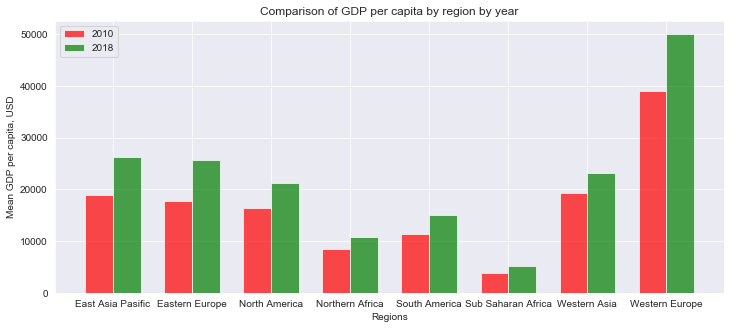

In [595]:
category_bars(gdp_region_2010, gdp_region_2018, 'Regions', 'Mean GDP per capita, USD', 'Comparison of GDP per capita by region by year')

**Conclusion:** Western Europe seems to have the highest GDP per capita followed by East Asia Pasific.
As expected, Africa shows the lowest GDP per capita.

#### How has the population grown by region from 2010 to 2018?<

Let's make a bar plot to see how the regions differ by population growth.

In [596]:
gdp_region_pg_2018 = df_gap_clean.groupby('region')['pg_2018'].mean()
gdp_region_pg_2010 = df_gap_clean.groupby('region')['pg_2010'].mean()
gdp_region_pg_2018

region
East Asia Pasific     1.075600
Eastern Europe       -0.117352
North America         1.091750
Northern Africa       1.476667
South America         1.176800
Sub Saharan Africa    2.381194
Western Asia          1.952625
Western Europe        0.685989
Name: pg_2018, dtype: float64

##### Let's plot a bar plot comparing the population growth by region by year

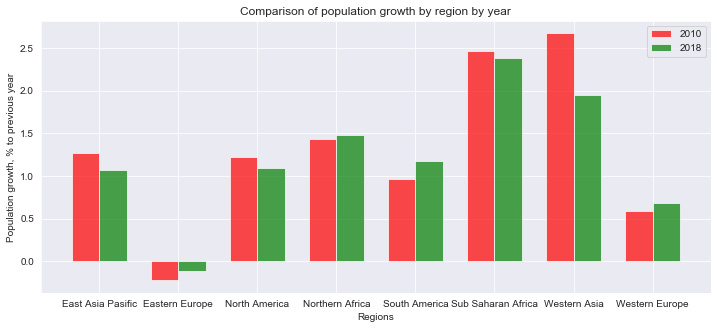

In [597]:
category_bars(gdp_region_pg_2010, gdp_region_pg_2018, 'Regions', 'Population growth, % to previous year', 'Comparison of population growth by region by year')

**Conclusion:** Western Asia and Africa show the highest population growth. All other regions, but Eastern Europe, show a positive population growth, while Eastern Europe has a negative population growth.

#### How does Russia stand to Germany and the United States in terms of GPD per capita?


In [598]:
is_three_countries = df_gap_clean['country'].isin(['Russia', 'Germany', 'United States'])
df_gap_three_countries = df_gap_clean[is_three_countries]
gdp_2010_three_countries = df_gap_three_countries['gdp_2010']
gdp_2018_three_countries = df_gap_three_countries['gdp_2018']
gdp_2018_three_countries

63     54600.0
143    26900.0
186    63700.0
Name: gdp_2018, dtype: float64

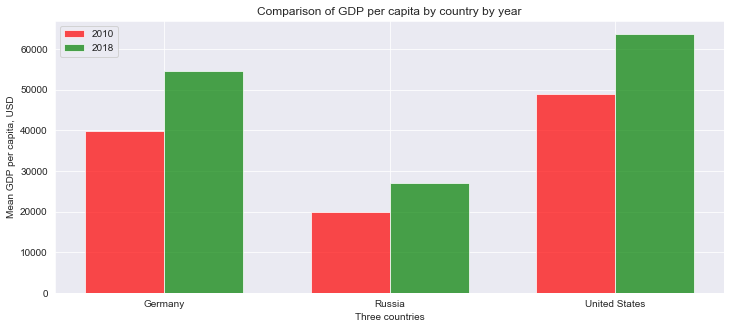

In [599]:
ind_three_countries = ['Germany', 'Russia', 'United States']
bar_places = np.arange(len(gdp_2018_three_countries))
width = 0.35
plt.subplots(figsize=(12, 5))
bars_2010 = plt.bar(bar_places, gdp_2010_three_countries, width, color='r', alpha=.7, label='2010')
bars_2018 = plt.bar(bar_places + width, gdp_2018_three_countries, width, color='g', alpha=.7, label = '2018')

# title and labels
plt.ylabel('Mean GDP per capita, USD')
plt.xlabel('Three countries')
plt.title('Comparison of GDP per capita by country by year')

locations = bar_places + width / 2  # xtick locations
labels = ind_three_countries  # xtick labels
plt.xticks(locations, labels)

plt.legend()
plt.show();

**Conclusion:** Among the three countries Russia has the lowest GDP per capita, Germany being on the second place with the United States having the highest GDP per capita. Both Germany and the United States are way beyond Russia.

#### How did the inequality, human development, democracy and corruption perception indices changed over this period?

Let's see the changes in the social indicators on a histogram. 

These indicators include:
- Inequality index
- Human development index
- Democracy level index and
- Corruption perception index

To see the changes, let's split our dataset in two, one for 2010 (or 2012) and the other one for 2018 (or 2015, or 2017).

In [600]:
# Create the dataset for 2010 with selected columns
columns_2010 = ['ineq_2010','hdi_2010','demox_2010','pci_2012']
df_2010 = df_gap_clean[columns_2010]
df_2010.rename(columns = {'ineq_2010': 'Inequality','hdi_2010': 'Human Development','demox_2010': 'Democracy','pci_2012': 'Corruption'}, inplace = True)
df_2010_mean = df_2010.mean()

df_2010_mean

Inequality           38.724615
Human Development    69.300000
Democracy            59.674615
Corruption           44.823077
dtype: float64

In [601]:
# Create the dataset for 2018
columns_2018 = ['ineq_2018','hdi_2015','demox_2018','pci_2017']
df_2018 = df_gap_clean[columns_2018]
df_2018.rename(columns = {'ineq_2018': 'Inequality','hdi_2015': 'Human Development','demox_2018': 'Democracy','pci_2017': 'Corruption'}, inplace = True)
df_2018_mean = df_2018.mean()
df_2018_mean

Inequality           38.376923
Human Development    71.405385
Democracy            59.684615
Corruption           45.115385
dtype: float64

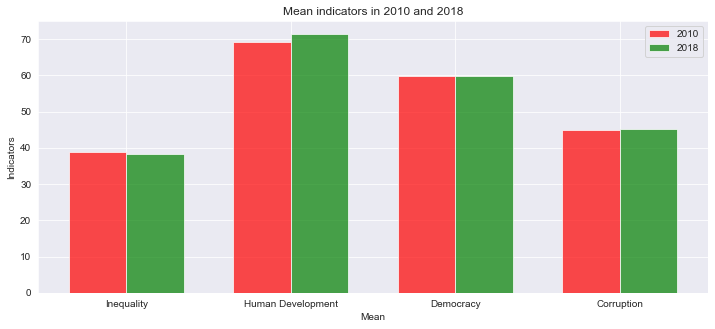

In [602]:
category_bars(df_2010_mean, df_2018_mean, 'Mean', 'Indicators', 'Mean indicators in 2010 and 2018')

**Conclusion:** As we can see from the histogram, the only noticeable change was in the Human Development Index. All other indices roughly stayed on the same level during the period under analysis.

<a id='question2'></a>
### Section 2: Are there tentative correlations between selected economic and social indicators? How does Russia stand compared to Germany and the US?

To answer these questions I will plot scatter plots to see if there is any apparent correlation.
On the plots I will pay special attention to the places where Russia, Germany and the Unites States stand.

##### Function to plot the scatter plots

Since the mechanism of drawing the scatter plots will be identical, I will wrap it up in a function.

In [603]:
# Write a function to show a scatter plot with two indicators
def scatter_plot(df, xcol, ycol, country, x_label, y_label):
    plt.figure(figsize=(12,7))
    plt.scatter(df[xcol], df[ycol], c = "b", s = 3**2, zorder = 2)
    selected_countries=['Germany','Russia', 'United States']
    mask=(df[country].isin(selected_countries))
    plt.scatter(df[xcol][mask], df[ycol][mask], c = "r", s = 5**2, zorder = 3)
    for (x, y, label) in df[[xcol, ycol, country]][mask].values:
        plt.text(x, y, label, zorder=4)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title('The correlation between {} and {}'.format(x_label, y_label))
    plt.show()

#### Is there a tentative correlation between life expectancy and GPD per capita?

In the scatter plot below I will analyse the correlation between the GDP per capita and life expectancy. I am inclined to say that there should be a positive correlation. A better well being should promote the length of life.

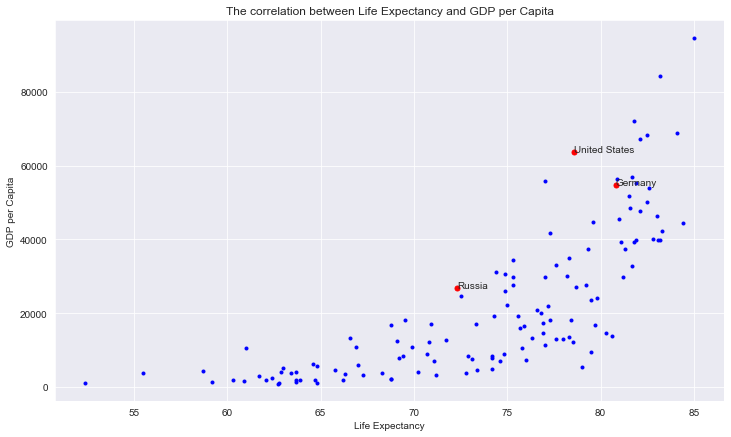

In [604]:
scatter_plot(df_gap_clean, 'le_2018', 'gdp_2018', 'country', 'Life Expectancy', 'GDP per Capita')

**Conclusion:** And indeed, there is a clear tentative positive correlation between the GDP per capita and the life expectancy.
Russia has considerably shorter life expectancy and smaller GDP per capita compared to Germany and the US. Germany has the highest life expectancy among the three countries and the US have the highest GDP per capita.

#### Is there a tentative correlation between the level of democracy and GDP per Capita?

On the next scatter plot I will check if there is a correlation between the GDP per capita and the level of democracy. In my opinion there should be a positive correlation.

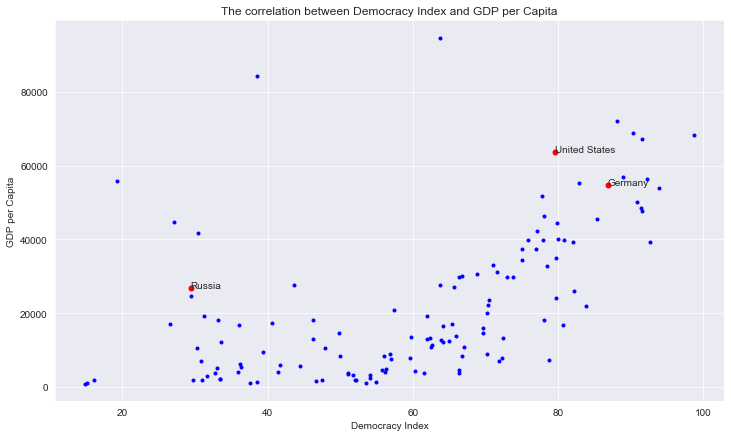

In [605]:
scatter_plot(df_gap_clean, 'demox_2018', 'gdp_2018', 'country', 'Democracy Index', 'GDP per Capita')

**Conclusion:** Indeed, the scatter plot also shows a positive correlation between the GDP per capita and the level of democracy. However, many outliers may be seen.
Russia on this plot is on the lower end with very low democracy index. Germany has the highest democracy index among the three countries.

#### Is there a tentative correlation between the level of corruption and and GDP per Capita?

On the next scatter plot I will check if there is a correlation between the GDP per capita and the level of corruption. In my opinion there should be a positive correlation.

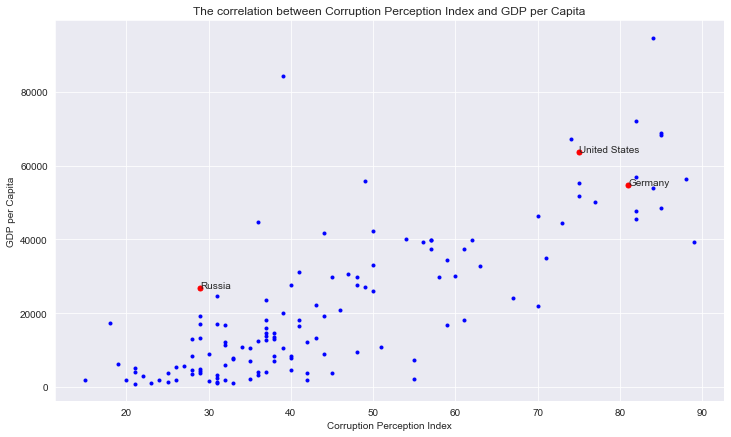

In [606]:
scatter_plot(df_gap_clean, 'pci_2017', 'gdp_2018', 'country', 'Corruption Perception Index', 'GDP per Capita')

**Conclusion:** There is a tentative correlation between the GPD per capita and the corruption perception level. Remember that a higher corruption index shows less corruption.
Again Russia is on the lower end of the sample. And Germany, again, has the highest Corruption Perception Index, which shows the least corruption among the three countries.

#### Is there a tentative correlation between human development and the level of democracy?

On the next scatter plot I will check if there is a correlation between the human development index and the democracy index. In my opinion, there should be a clear positive correlation between the two indices.

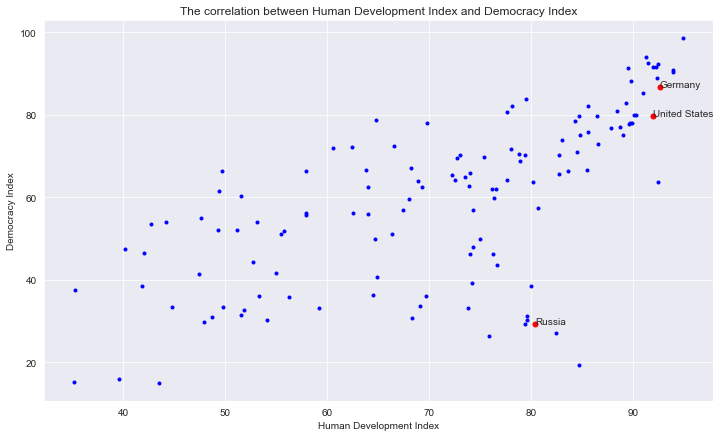

In [607]:
scatter_plot(df_gap_clean, 'hdi_2015', 'demox_2018', 'country', 'Human Development Index', 'Democracy Index')

**Conclusion:** The positive correlation is not that obvious. A positive correlation may be seen but there are many outliers and the countries are scattered quite a lot.
Russia is among the outliers, with a very low democracy index and a rather high human development index.

#### Is there a tentative correlation bewteen government military expenditures and the level of democracy?

On the next scatter plot I want to check if there is a correlation between the level of government military expenditures and the democracy index. I would think that more democratic countries would spend less on military expenses.

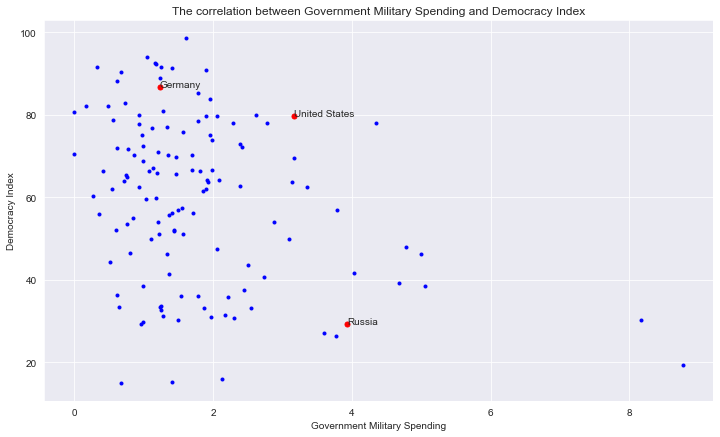

In [608]:
scatter_plot(df_gap_clean, 'gms_2018', 'demox_2018', 'country', 'Government Military Spending', 'Democracy Index')

**Conclusion:** There seems to be a very vague negative correlation: I don't see a clear dependency between the level of democracy and the military expenditures. Russia has the lowest democracy level among the three countries but the highest military expenditures as a percentage of GDP.

#### Is there a tentative correlation bewteen the level of inequality and the level of democracy?

On the next scatter plot I want to check if there is a correlation between the level of inequality and the democracy index. I would think that more democratic countries would have less inequality in income distribution.

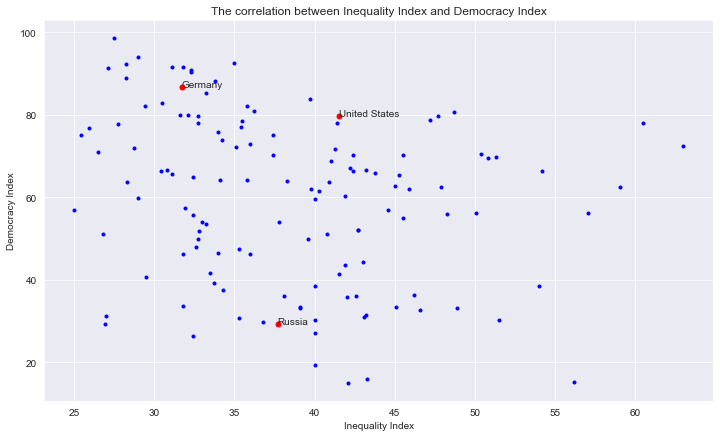

In [609]:
scatter_plot(df_gap_clean, 'ineq_2018', 'demox_2018', 'country', 'Inequality Index', 'Democracy Index')

**Conclusion:** There seems to be no correlation between the democracy level and the level of income inequality. Russia has a low democracy index and stands in the middle of Germany and the US in terms of income inequality.

<a id='question3'></a>
### Section 3:  What are the developments in the distribution of income in the world?


#### Is income distributed equally among countries in 2018?

Let's plot some visualisations to see the distribution of income in 2018 among the countries. I will start with a simple histogram

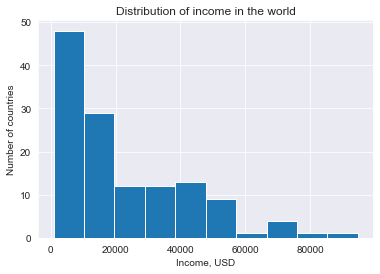

In [610]:
# Plot the distribution of GDP per capita
df_gdp = df_gap_clean['gdp_2018']
df_gdp.hist();
plt.title('Distribution of income in the world')
plt.xlabel('Income, USD')
plt.ylabel('Number of countries')
plt.show()


In [611]:
df_gdp.describe()

count      130.000000
mean     22066.615385
std      20283.193239
min        900.000000
25%       5477.500000
50%      15250.000000
75%      34000.000000
max      94700.000000
Name: gdp_2018, dtype: float64

From the histogram and summary above of the 2018 GDP per capita indicators I can see that the distribution of income is far from normal. It is very right-skewed.
The mean income is around 22K, the standard deviation is almost as big as the mean.
The minimal income is only 900, while the maximum income is as much as 95K.
The average income is 15,7K.

**Conclusion:** This shows great inequality among the countries in terms of income distribution.

#### What are the poorest and the richest countries

Let's see which countries are at the very bottom and at the very top of the food chain.

##### Poorest countries

In [612]:
# Identify low income countries in the lowest quartile:
low_income = df_gap_clean.query('gdp_2018 < 5555.0')
low_income['country'].count()

33

In [613]:
# List the poorest 5 countries
sort_by_income = df_gap_clean.sort_values('gdp_2018')
sort_by_income.head(5)

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
38,"Congo, Dem. Rep.",Sub Saharan Africa,620.0,900.0,57.9,62.7,3.33,3.23,42.1,42.1,39.8,43.5,21.5,14.9,0.890,0.669,21.0,21.0
32,Central African Republic,Sub Saharan Africa,970.0,920.0,48.0,52.4,1.13,1.52,56.2,56.2,36.1,35.2,18.2,15.2,2.600,1.410,26.0,23.0
128,Niger,Sub Saharan Africa,790.0,1040.0,59.1,62.8,3.84,3.82,34.0,34.3,32.3,35.3,33.8,37.6,1.170,2.450,33.0,33.0
98,Liberia,Sub Saharan Africa,980.0,1130.0,61.3,64.8,3.59,2.45,35.1,33.2,40.6,42.7,50.7,53.5,0.655,0.765,41.0,31.0
105,Malawi,Sub Saharan Africa,1040.0,1310.0,54.2,63.7,2.87,2.64,44.4,45.5,44.4,47.6,58.4,54.9,0.718,0.846,37.0,31.0


In [614]:
poorest_country = df_gap_clean.query('gdp_2018 == 900.0')
poorest_country

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
38,"Congo, Dem. Rep.",Sub Saharan Africa,620.0,900.0,57.9,62.7,3.33,3.23,42.1,42.1,39.8,43.5,21.5,14.9,0.89,0.669,21.0,21.0


**Conclusion:** There are as much as 33 countries in the lowest quartile with income less than 5.5K.
The poorest country is the Democratic Republic of Congo with GDP per Capita of USD 900.

##### Richest countries

In [615]:
# Identify high-income countries in the highest quartile:
high_income = df_gap_clean.query('gdp_2018 >= 33700.00')
high_income['country'].count()

33

In [616]:
# List the richest 5 countries
sort_by_income = df_gap_clean.sort_values('gdp_2018', ascending = False)
sort_by_income.head(5)

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
156,Singapore,East Asia Pasific,70800.0,94700.0,83.2,85.0,1.77,0.470,42.5,40.9,91.1,92.5,58.9,63.8,3.430,3.140,87.0,84.0
92,Kuwait,Western Asia,79200.0,84300.0,81.2,83.2,5.88,1.980,40.0,40.0,79.2,80.0,38.8,38.5,3.760,5.060,44.0,39.0
102,Luxembourg,Western Europe,61800.0,72200.0,80.8,81.8,1.83,1.930,32.1,33.8,89.4,89.8,88.8,88.1,0.515,0.612,80.0,82.0
168,Switzerland,Western Europe,56200.0,68800.0,82.5,84.1,1.04,0.724,32.5,32.3,93.2,93.9,90.9,90.3,0.705,0.676,86.0,85.0
130,Norway,Western Europe,58600.0,68300.0,80.9,82.5,1.25,0.660,26.0,27.5,93.9,94.9,98.0,98.7,1.510,1.610,85.0,85.0


In [617]:
richest_country = df_gap_clean.query('gdp_2018 == 94700.00')
richest_country

,country,region,gdp_2010,gdp_2018,le_2010,le_2018,pg_2010,pg_2018,ineq_2010,ineq_2018,hdi_2010,hdi_2015,demox_2010,demox_2018,gms_2010,gms_2018,pci_2012,pci_2017
156,Singapore,East Asia Pasific,70800.0,94700.0,83.2,85.0,1.77,0.47,42.5,40.9,91.1,92.5,58.9,63.8,3.43,3.14,87.0,84.0


**Conclusion:** There are as much as 33 countries in the highest quartile with income more than 33.7K.
The richest country is Singapore with GDP per Capita of USD 94.7K.

#### Which regions have the highest and lowest inequality index and how has the index changed by region in 2018 compared to 2010?

On the plot below I will see the development of the inequality index by regions to identify regions with the highest inequality in income distribution within the country.

In [618]:
gdp_region_ineq_2018 = df_gap_clean.groupby('region')['ineq_2018'].mean()
gdp_region_ineq_2010 = df_gap_clean.groupby('region')['ineq_2010'].mean()
gdp_region_ineq_2018

region
East Asia Pasific     36.586667
Eastern Europe        31.461905
North America         44.525000
Northern Africa       35.733333
South America         45.640000
Sub Saharan Africa    44.623529
Western Asia          35.031250
Western Europe        31.784211
Name: ineq_2018, dtype: float64

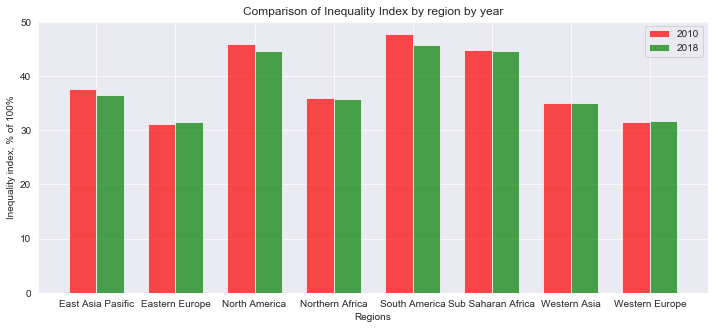

In [619]:
ind_region_ineq = gdp_region_ineq_2018.index
bar_places = np.arange(len(gdp_region_ineq_2018))
width = 0.35
plt.subplots(figsize=(12, 5))
bars_2010 = plt.bar(bar_places, gdp_region_ineq_2010, width, color='r', alpha=.7, label='2010')
bars_2018 = plt.bar(bar_places + width, gdp_region_ineq_2018, width, color='g', alpha=.7, label = '2018')

# title and labels
plt.ylabel('Inequality index, % of 100%')
plt.xlabel('Regions')
plt.title('Comparison of Inequality Index by region by year')

locations = bar_places + width / 2  # xtick locations
labels = ind_region_ineq  # xtick labels
plt.xticks(locations, labels)

plt.legend()
plt.show();

**Conclusion:** South America, North America and Sub-Saharan Africa show the highest income inequality within the country. Europe seems to have the least income inequality.

<a id='conclusions'></a>
## Conclusions

Based on Gapminder data and my analysis of it, I summarised below the conclusions regarding the development of the society in 2018 compared to 2010.
In the analysis I used the methods of descriptive statistics and visualisations.
So the conclusions regarding potential correlations between indicators are tentative and may deviate from the actual state of affairs.

**Section 1: General developments in the world in 2018 compared to 2010**
> GDP per capita has noticeably increased by 5 353 USD. Western Europe seems to have the highest GDP per capita followed by East Asia Pasific. Africa shows the lowest GDP per capita. Western Asia and Africa have shown the highest population growth. Eastern Europe has a negative population growth. The only noticeable increase was in the Human Development Index. The levels of democracy, corruption and inequality roughly stayed the same.
> Among the three countries Russia has the lowest GDP per capita, Germany being on the second place with the United States having the highest GDP per capita.
    
**Section 2: Are there tentative correlations between certain indicators?**
>There is are clear tentative positive correlations between GDP per capita and life expectancy, between GDP per capita and the level of democracy. Russia has considerably shorter life expectancy and smaller GDP per capita compared to Germany and the US. Russia shows a very low democracy index, while Germany has the highest democracy index among the three countries.
There is a tentative negative correlation between GPD per capita and the corruption perception level. Russia is on the lower end of the sample, while Germany shows the lowest level of corruption among the three countries.
There seems to be no obvious correlations between human development and democracy or between democracy and military expenditures or bewteen democracy and inequality. Russia is among the outliers, with a very low democracy index and a rather high human development index and high military expenditures.

**Section 3:  What are the developments in the disbribution of income in the world?**
>There is great inequality among the countries in terms of income distribution. 33 countries are in the lowest quartile with income less than 5.5K. The poorest country is Congo with GDP of USD 900. Other 33 countries are in the highest quartile with income more than 33.7K. The richest country is Singapore with GDP of USD 94.7K.
South America, North America and Sub-Saharan Africa show the highest income distribution inequality within the country. Europe seems to have the least income inequality.